In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('/content/tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape

(418, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


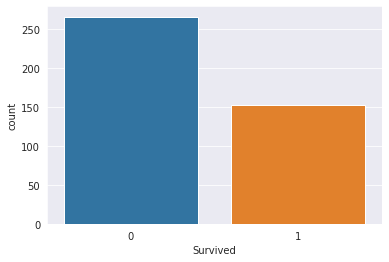

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=df)

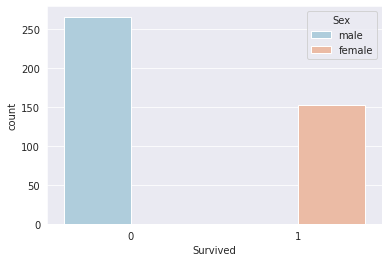

In [14]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df, palette='RdBu_r')

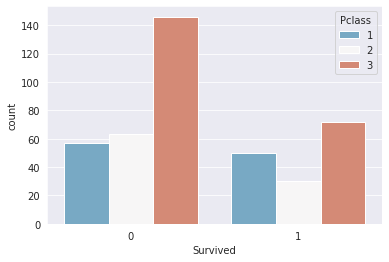

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=df, palette='RdBu_r')

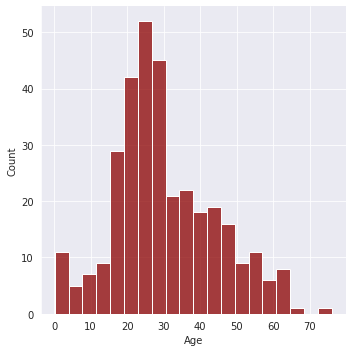

In [18]:
sns.displot(df['Age'].dropna(),kde= False, color= 'darkred', bins= 20 )

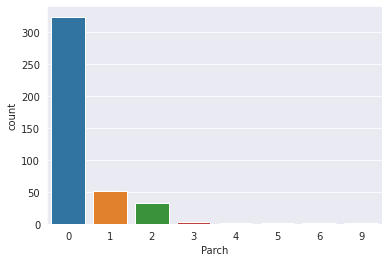

In [20]:
sns.countplot(x='Parch',data=df)

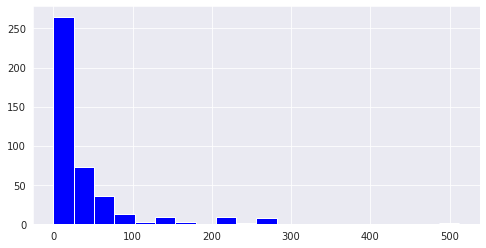

In [22]:
df['Fare'].hist(color='blue', bins=20, figsize=(8,4))

**COVERTING CATEGORICAL VALUE**

In [30]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [31]:
sex= pd.get_dummies(df['Sex'],drop_first=True)
embark= pd.get_dummies(df['Embarked'],drop_first=True)

In [32]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,892,0,3,34.5,0,0,7.8292,NaN
1,893,1,3,47.0,1,0,7.0000,NaN
2,894,0,2,62.0,0,0,9.6875,NaN
3,895,0,3,27.0,0,0,8.6625,NaN
4,896,1,3,22.0,1,1,12.2875,NaN


In [35]:
df=pd.concat([df,sex,embark],axis=1)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,892,0,3,34.5,0,0,7.8292,NaN,1,1,0
1,893,1,3,47.0,1,0,7.0000,NaN,0,0,1
2,894,0,2,62.0,0,0,9.6875,NaN,1,1,0
3,895,0,3,27.0,0,0,8.6625,NaN,1,0,1
4,896,1,3,22.0,1,1,12.2875,NaN,0,0,1


In [45]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,892,3,34.5,0,0,7.8292,NaN,1,1,0
1,893,3,47.0,1,0,7.0000,NaN,0,0,1
2,894,2,62.0,0,0,9.6875,NaN,1,1,0
3,895,3,27.0,0,0,8.6625,NaN,1,0,1
4,896,3,22.0,1,1,12.2875,NaN,0,0,1


In [38]:
df['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64